In [1]:
import cv2
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy
import numpy as np
import os
# %matplotlib inline
# pil_im = Image.open('data/empire.jpg', 'r')
# imshow(np.asarray(pil_im))

In [46]:
CROP_RECT = (150, 200, 500, 390)

In [2]:


POLYGON_MASK = [
    (0, 0),
    (0, 288),
    (44, 288),
    (140, 125),
    (160, 125),
    (164, 288),
    (352, 288),
    (352, 0),
]

CROP_RECT = (44, 125, 164, 286)


def process(file_path):
    # Open the file path with PIL.Image
    image = Image.open(file_path)

    # Use PIL.ImageDraw to fill in a black polygon
    ImageDraw.Draw(image).polygon(POLYGON_MASK, fill=(0, 0, 0))

    # Crop the image to get ride of unnecessary pixels
    cropped_image = image.crop(CROP_RECT)

    # Let's look at the result!
    cropped_image.save('output.png')

In [21]:
def draw_grid(file_path=None, image=None):
    if image is None:
        image = Image.open(file_path)
    
    my_dpi = 100
    # Set up figure
    fig=plt.figure(figsize=(float(image.size[0])/my_dpi,float(image.size[1])/my_dpi),dpi=my_dpi)
    ax=fig.add_subplot(111)

    # Remove whitespace from around the image
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1)

    # Set the gridding interval: here we use the major tick interval
#     myInterval = 100
#     loc = plticker.MultipleLocator(base=myInterval)
#     ax.xaxis.set_major_locator(loc)
#     ax.yaxis.set_major_locator(loc)

    # Add the grid
    ax.grid(which='major', axis='both', linestyle='-', color='r')

    # Add the image
    ax.imshow(image)

    # Find number of gridsquares in x and y direction
#     nx=abs(int(float(ax.get_xlim()[1]-ax.get_xlim()[0])/float(myInterval)))
#     ny=abs(int(float(ax.get_ylim()[1]-ax.get_ylim()[0])/float(myInterval)))

    # Add some labels to the gridsquares
#     for j in range(ny):
#         y=myInterval/2+j*myInterval
#         for i in range(nx):
#             x=myInterval/2.+float(i)*myInterval
#             ax.text(x,y,'{:d}'.format(i+j*nx),color='w',ha='center',va='center')

    # Save the figure
#     fig.savefig('myImageGrid.tiff',dpi=my_dpi)
    imshow(image)
    return image

In [7]:
def get_image(file_path):
    return Image.open(file_path)

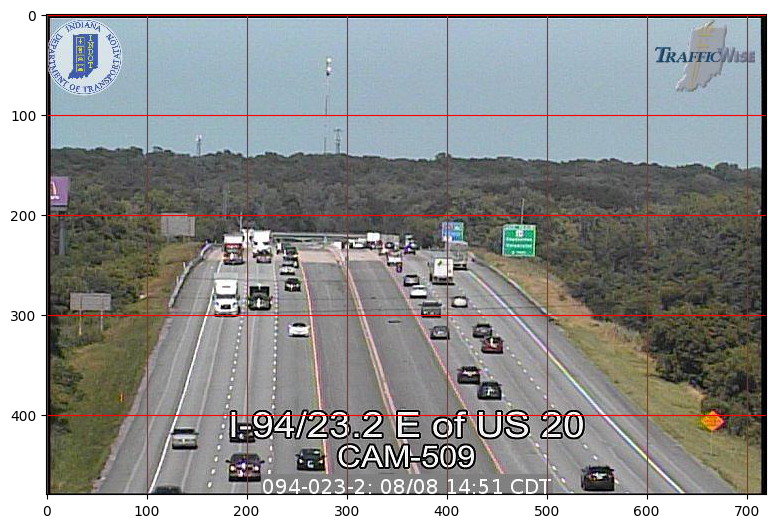

In [42]:
img_grid = draw_grid('images/172_6_17_30/2018_08_08_15_08.jpg')

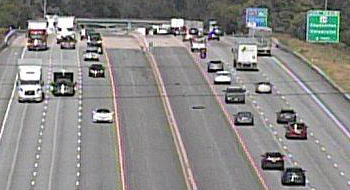

In [47]:
img_grid.crop(CROP_RECT)

In [50]:
def get_edged_image(file_path):
    img = get_image(file_path)
#     img = img.crop(CROP_RECT)
    # Use numpy to convert the image from PIL format to OpenCV
    opencv_image = cv2.cvtColor(numpy.array(img), cv2.COLOR_RGB2BGR)

    # Apply the Canny edge detection algorithm
    edged_image = cv2.Canny(opencv_image, 100, 500)
    return edged_image

def get_edge_count(file_path=None, edged_image=None):
    if edged_image is None:
        edged_image = get_edged_image(file_path)
    
    count = 0

    width, height = edged_image.shape[:2]

    for x in range(0, width):
        for y in range(0, height):
            if edged_image[x, y] == 255:
                count = count + 1

    return count, edged_image


In [27]:
def dilate(edged_image):
    kernel = np.ones((1,2),np.uint8)
    d = cv2.dilate(edged_image, kernel, iterations = 5)
    return d

def erode(edged_image):
    kernel = np.ones((1,2),np.uint8)
    e = cv2.erode(edged_image,kernel,iterations = 9)
    return e

In [63]:
image_edges = []

# Set the directory you want to start from
rootDir = 'images/'
for dirName, subdirList, fileList in os.walk(rootDir):
    print(f'{dirName}')
    for fname in fileList:
        file_path = os.path.join(dirName, fname)
        if os.path.splitext(fname)[1] == '.jpg':
            try:
                edge_counts = get_edge_count(f'{file_path}')
                image_edges.append((fname, edge_counts[0], edge_counts[1]))
            except OSError as e:
                print(f'failed to get image: {fname} - {e}')
#         edges = get_edge_count(f'{rootDir}/{fname}')
#         print(f'\t{fname} - {edges}')

        

images/


images/172_6_5_27


images/172_130_150_69


images/172_6_5_20


images/172_20_51_45


images/172_64_181_11


images/172_208_126_10


images/172_175_90_10


images/172_130_150_67


images/172_21_21_58


images/172_64_220_10


images/172_25_23_22


images/172_20_71_17


images/172_64_204_10


images/172_25_27_46


images/172_159_151_10


images/172_20_31_132


images/172_21_11_32


images/172_175_0_10


images/172_26_21_73


failed to get image: 2018_08_08_22_41.jpg - cannot identify image file 'images/172_26_21_73/2018_08_08_22_41.jpg'
images/172_25_21_254


images/172_20_71_72


images/172_26_11_88


images/172_208_102_10


images/172_25_21_253


images/172_20_61_21


images/172_21_11_35


images/172_21_21_61


images/172_25_51_67


images/172_26_25_18


images/172_21_11_51


images/172_64_220_11


images/172_159_120_10


images/172_20_51_44


images/172_6_5_21


images/172_128_0_195


images/172_64_181_10


images/172_6_5_26


images/172_20_71_165


images/172_25_27_25


ima

images/172_65_21_10


images/172_20_51_111


images/172_6_17_30


images/172_20_51_116


images/172_142_63_39


images/172_175_1_10


images/172_20_21_72


images/172_10_0_43


images/172_26_41_95


images/172_25_11_86


images/172_25_22_91


images/172_20_21_50


images/172_25_11_81


images/172_128_0_75


images/172_20_11_56


images/172_26_41_57


images/172_10_0_57


images/172_152_43_6


images/172_21_71_29


images/172_21_61_29


images/172_100_8_10


failed to get image: 2018_08_08_22_41.jpg - cannot identify image file 'images/172_100_8_10/2018_08_08_22_41.jpg'
images/172_25_11_110


images/172_64_216_12


images/172_7_97_26


images/172_191_163_10


images/172_21_61_11


images/172_6_13_25


images/172_130_175_712


images/172_26_41_32


images/172_10_0_32


images/172_6_17_24


images/172_20_21_60


images/172_25_22_191


images/172_20_31_34


images/172_10_0_51


images/172_25_21_75


images/172_10_0_93


images/172_10_0_58


images/172_26_41_94


images/172_6_17_25


images

images/172_5_5_10


failed to get image: 2018_08_08_22_41.jpg - cannot identify image file 'images/172_5_5_10/2018_08_08_22_41.jpg'
images/172_159_127_10


images/172_130_150_71


images/172_5_5_17


failed to get image: 2018_08_08_22_41.jpg - cannot identify image file 'images/172_5_5_17/2018_08_08_22_41.jpg'
images/172_159_142_10


images/172_20_51_96


images/172_130_150_76


images/172_21_21_40


images/172_208_71_10


images/172_20_51_98


images/172_21_21_204


images/172_65_56_10


images/172_64_196_10


images/172_25_41_46


images/172_25_27_92


images/172_21_21_14


images/172_25_41_84


images/172_20_51_31


images/172_25_27_57


images/172_64_237_11


images/172_20_51_99


images/172_5_5_18


failed to get image: 2018_08_08_22_41.jpg - cannot identify image file 'images/172_5_5_18/2018_08_08_22_41.jpg'
images/172_100_18_10


failed to get image: 2018_08_08_22_41.jpg - cannot identify image file 'images/172_100_18_10/2018_08_08_22_41.jpg'
images/172_21_11_49


images/172_21_

In [66]:
sort_images = sorted(image_edges, key=lambda x: x[1], reverse=True)
sort_images[:10]

[('2018_08_09_08_30.jpg', 145209, array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)),
 ('2018_08_09_09_00.jpg', 131240, array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)),
 ('2018_08_09_10_30.jpg', 125511, array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)),
 ('2018_08_09_10_00.jpg', 121561, array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, .

In [67]:
sorted_imgs = sorted(image_edges, key=lambda x: x[1], reverse=True)
for img in sorted_imgs[:10]:
    image = Image.open(f'{rootDir}/{img[0]}')
    plt.figure()
    plt.title(f'{img[0]} - {img[1]}')
    image = image.crop(CROP_RECT)
    plt.imshow(image)
    
    plt.figure()
    plt.title(f'Edged:  {fname} - {img[1]}')
    plt.imshow(img[2])
    
    d = dilate(img[2])
    plt.figure()
    plt.title(f'Dilated {fname} - {img[1]}')
    plt.imshow(d)
    
    e = erode(d)
    plt.figure()
    plt.title(f'Eroded: {fname} - {img[1]}')
    plt.imshow(e)
    


    #     imshow(image)

FileNotFoundError: [Errno 2] No such file or directory: 'images//2018_08_09_08_30.jpg'

In [105]:
img = get_image('images/172_6_17_30/2018_08_08_15_08.jpg')
# Use numpy to convert the image from PIL format to OpenCV
opencv_image = cv2.cvtColor(numpy.array(img), cv2.COLOR_RGB2BGR)

# Apply the Canny edge detection algorithm
edged_image = cv2.Canny(opencv_image, 100, 200)

# Let's look at the result!
# imshow(edged_image)
# dir(edged_image)
total = 0
for i, l in enumerate(edged_image.tolist()):
    up_count = [1 for e in l if e == 255]
    total += len(up_count)
    print(f'List Id: {i} {len(up_count)}')
total

List Id: 0 0
List Id: 1 0
List Id: 2 0
List Id: 3 690
List Id: 4 22
List Id: 5 2
List Id: 6 14
List Id: 7 23
List Id: 8 21
List Id: 9 24
List Id: 10 23
List Id: 11 27
List Id: 12 27
List Id: 13 31
List Id: 14 29
List Id: 15 24
List Id: 16 20
List Id: 17 26
List Id: 18 14
List Id: 19 23
List Id: 20 39
List Id: 21 22
List Id: 22 39
List Id: 23 23
List Id: 24 27
List Id: 25 25
List Id: 26 21
List Id: 27 26
List Id: 28 26
List Id: 29 26
List Id: 30 35
List Id: 31 23
List Id: 32 24
List Id: 33 45
List Id: 34 29
List Id: 35 35
List Id: 36 36
List Id: 37 49
List Id: 38 55
List Id: 39 56
List Id: 40 44
List Id: 41 43
List Id: 42 43
List Id: 43 49
List Id: 44 58
List Id: 45 51
List Id: 46 73
List Id: 47 47
List Id: 48 96
List Id: 49 32
List Id: 50 31
List Id: 51 34
List Id: 52 27
List Id: 53 30
List Id: 54 31
List Id: 55 29
List Id: 56 28
List Id: 57 31
List Id: 58 26
List Id: 59 26
List Id: 60 30
List Id: 61 29
List Id: 62 27
List Id: 63 32
List Id: 64 39
List Id: 65 22
List Id: 66 20
List Id:

40706

In [ ]:
edged_image.